In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_path = '../DataSet'
file_name1 = '20130302-235800.nc'
file_name2 = '20130729-021600.nc'

In [3]:
path_f = os.path.join(data_path,"Fallgruppe_60",file_name1)
path_c = os.path.join(data_path,"Kontrollgruppe_60",file_name2)

In [4]:
df_f = xr.open_dataset(path_f).to_array(dim='feature').transpose().to_pandas()
df_c = xr.open_dataset(path_c).to_array(dim='feature').transpose().to_pandas()
fhr_f = df_f['corrected']
toco_f = df_f['toco-out']
fhr_c = df_c['corrected']
toco_c = df_c['toco-out']

In [5]:
spe_f = np.fft.rfft(fhr_f[-5000:-4000])
spe_c = np.fft.rfft(fhr_c[-5000:-4000])
#print(len(spe_f))
#print(len(spe_c))

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


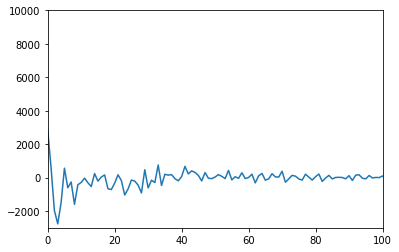

In [6]:
plt.plot(spe_f[1:len(spe_f)])
plt.xlim(0,100)
plt.ylim(-3000,10000)
plt.show()

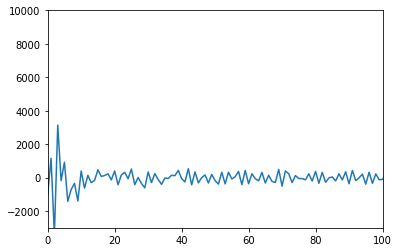

In [7]:
plt.plot(spe_c[1:len(spe_c)])
plt.xlim(0,100)
plt.ylim(-3000,10000)
plt.show()

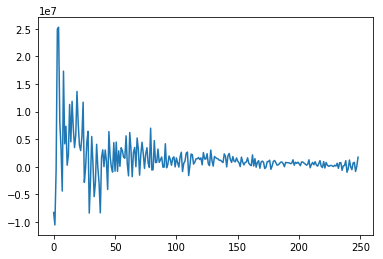

In [8]:
acorr_fhr = np.correlate(spe_f[1:len(spe_f)],spe_f[1:len(spe_f)],mode='same')
plt.plot(acorr_fhr[round(len(acorr_fhr)/2)+1:])
plt.show()

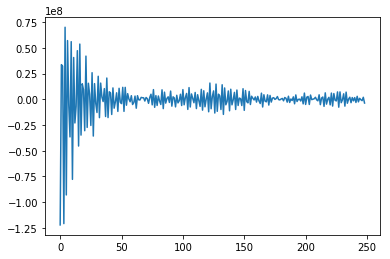

In [9]:
acorr_fhr = np.correlate(spe_c[1:len(spe_c)],spe_c[1:len(spe_c)],mode='same')
plt.plot(acorr_fhr[round(len(acorr_fhr)/2)+1:])
plt.show()

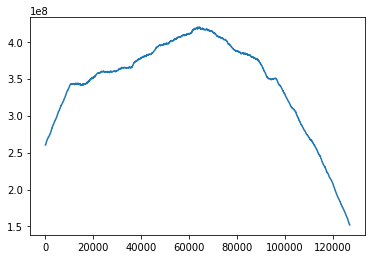

In [15]:
xcorr_f = np.correlate(fhr_f,toco_f,mode='same')
plt.plot(xcorr_f)
plt.show()

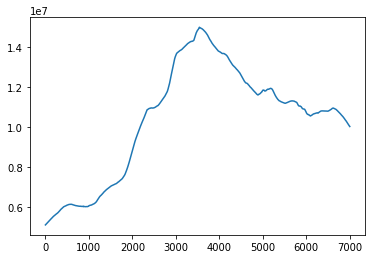

In [16]:
xcorr_c = np.correlate(fhr_c,toco_c,mode='same')
plt.plot(xcorr_c)
plt.show()